In [1]:
# Importing Pythoon Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df=pd.read_csv("Bank_Churn.csv")
df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# drop the unnecesary columns
df.drop(columns=['CustomerId','Surname'],axis=1,inplace=True)

In [4]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [5]:
df.shape

(10000, 11)

In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [15]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Data Preprocessing

### Encoding 

In [21]:
df['Geography'].value_counts() 

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [23]:
df['Geography']=df['Geography'].map({'France':0,'Germany':1,'Spain':2})

In [25]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

In [27]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


## Data Visualization

In [30]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited'>

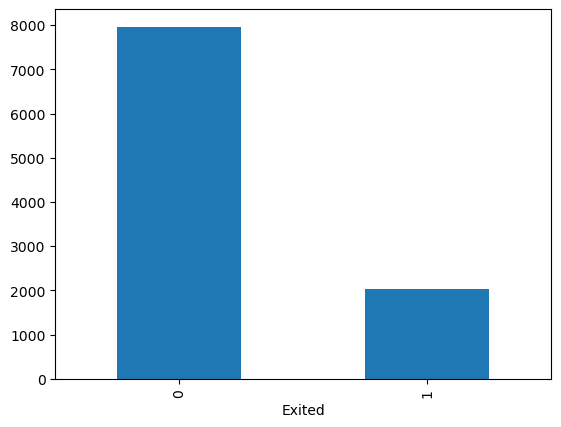

In [32]:
df['Exited'].value_counts().plot(kind='bar')  

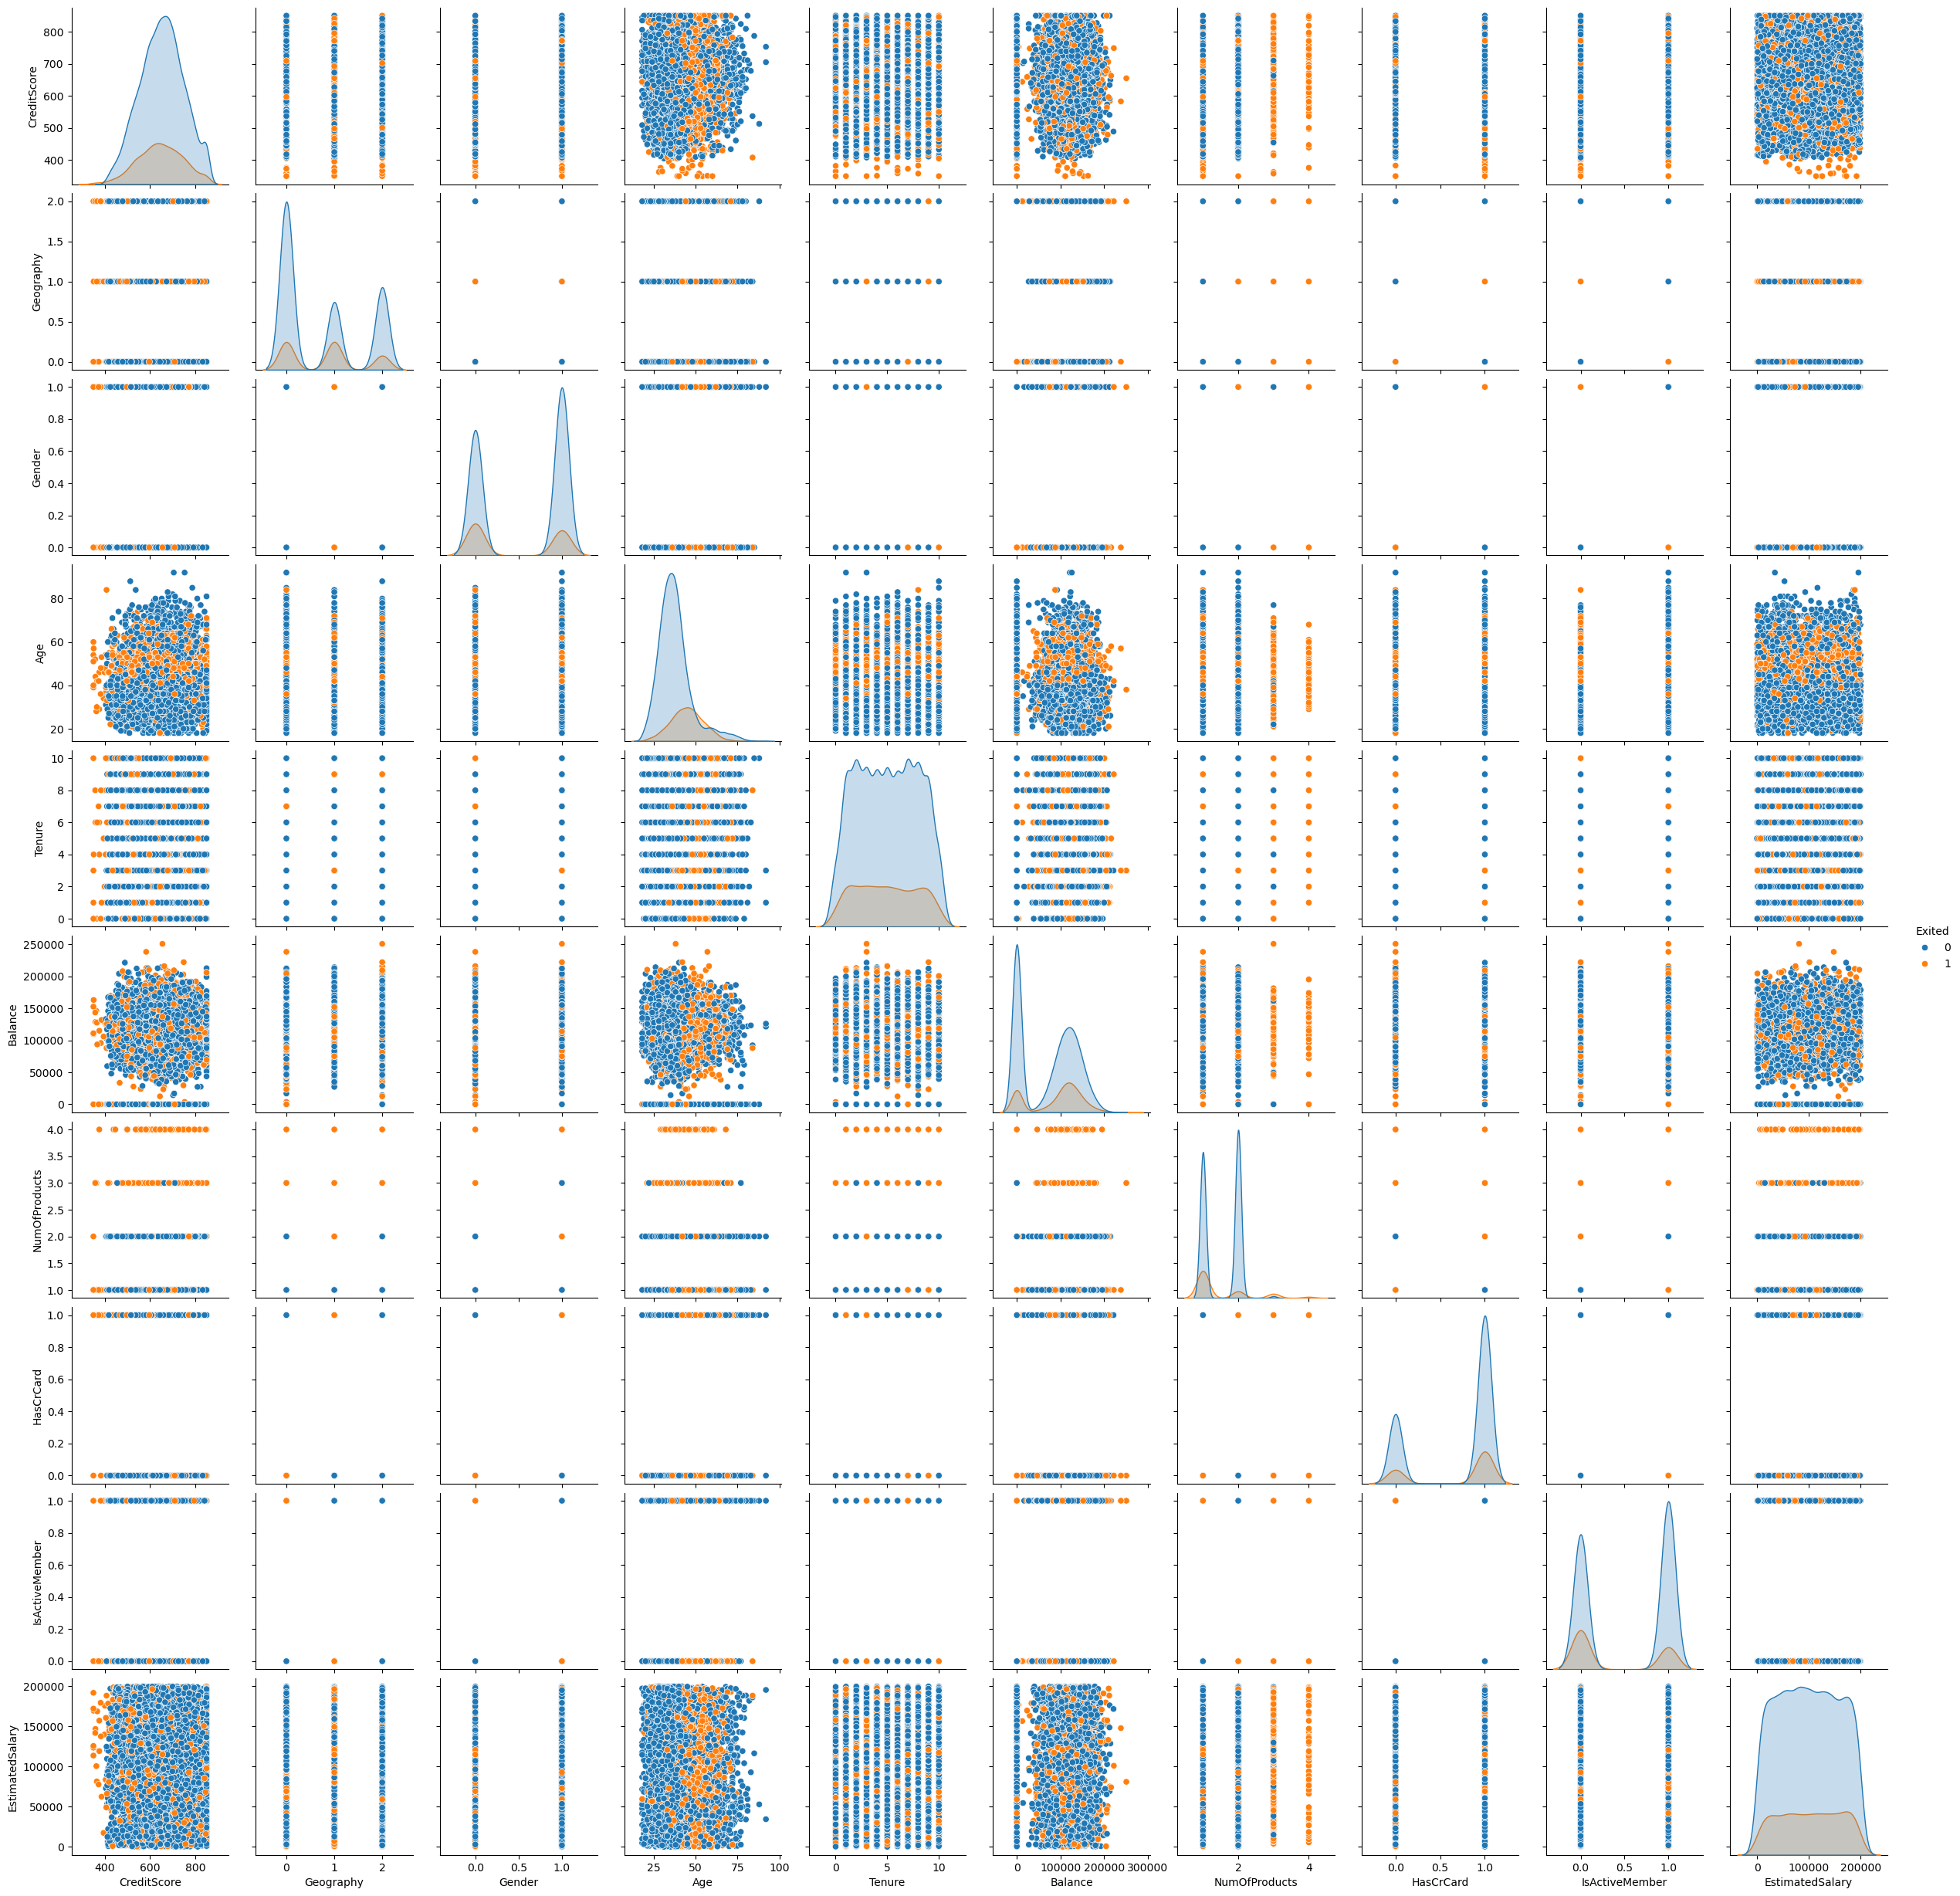

In [34]:
# Visualizing
sns.pairplot(df, hue = 'Exited')

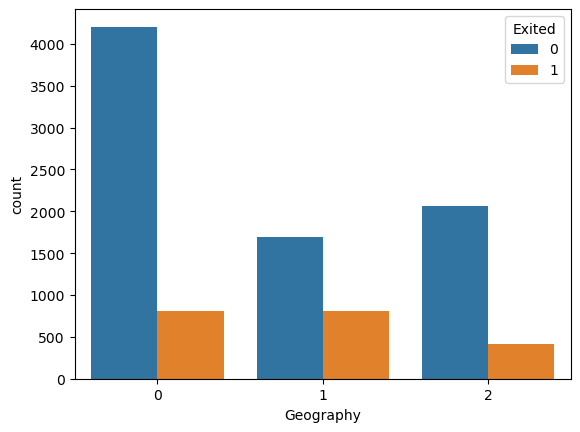

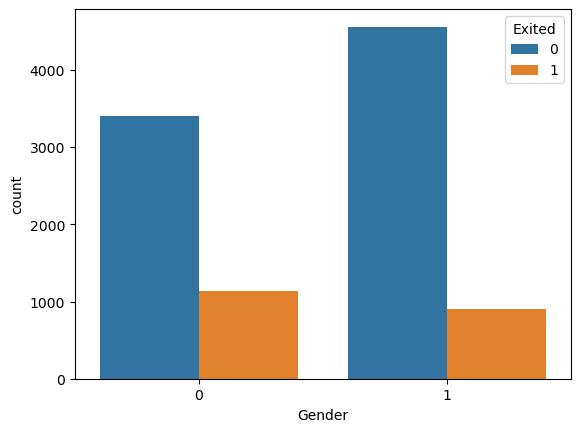

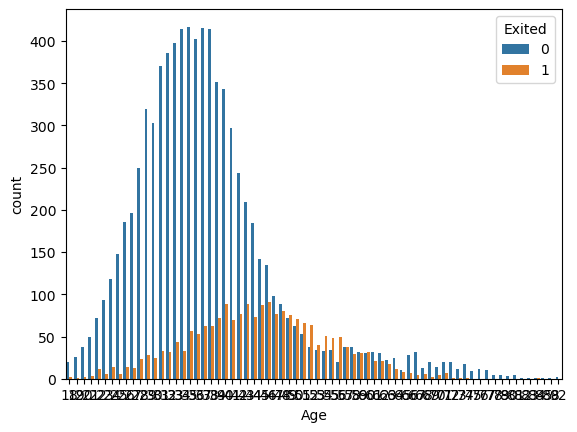

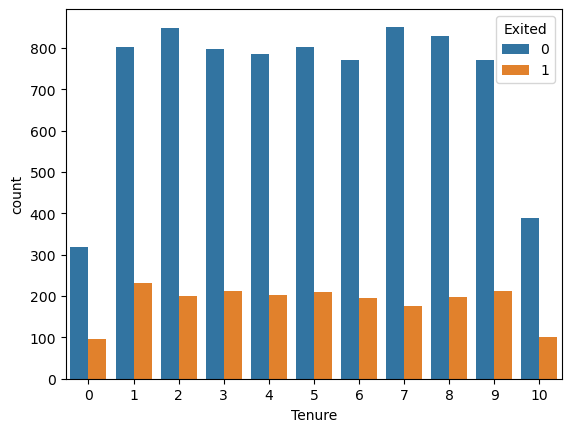

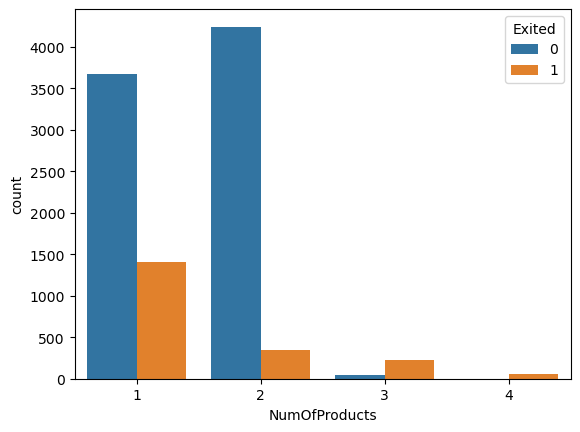

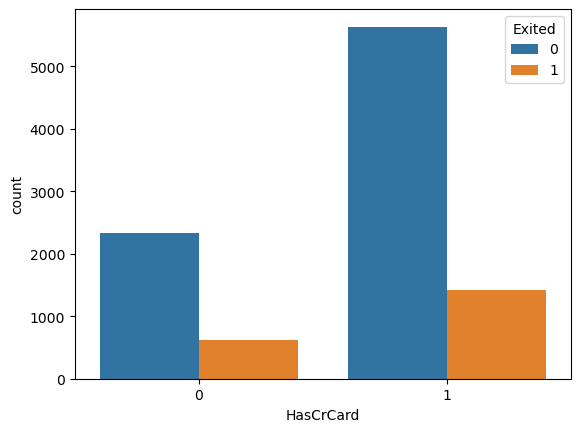

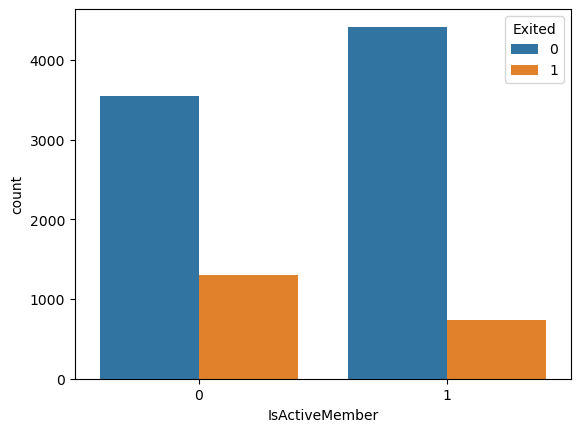

In [36]:
# Investigate all the features by our y
features = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember']

for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=df, hue = 'Exited')

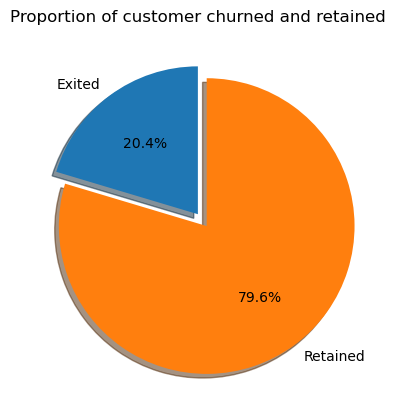

In [38]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Proportion of customer churned and retained")
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

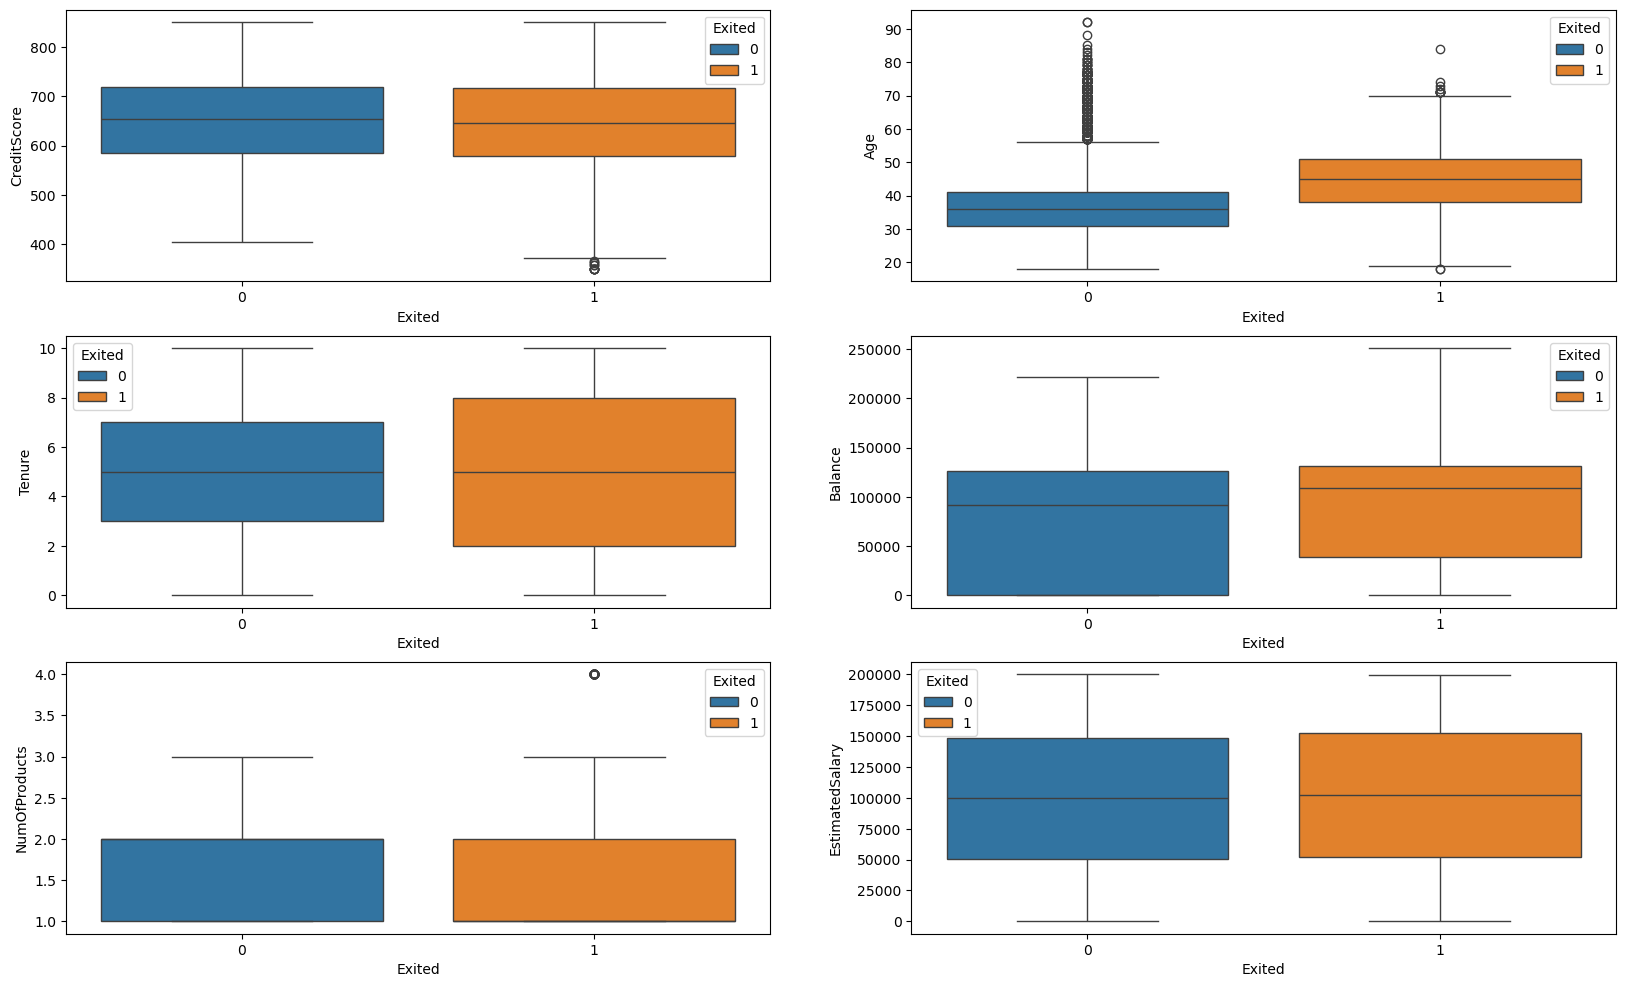

In [40]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

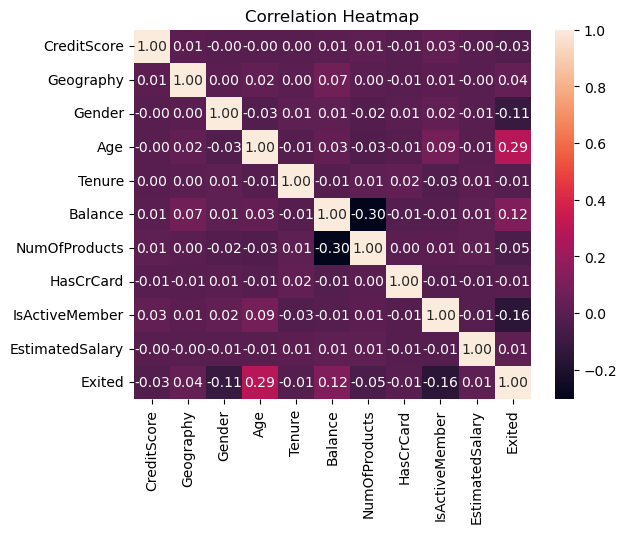

In [42]:
## Correlation Matrix of Features
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap')
plt.show()

In [44]:
# Splitting the dataset into Train Test Spilt
x = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [46]:
## Handling imbalance dataset 
from imblearn.over_sampling import SMOTE
resampler = SMOTE()
X,Y = resampler.fit_resample(x,y) 

In [48]:
counts = Y.value_counts()
counts

Exited
1    7963
0    7963
Name: count, dtype: int64

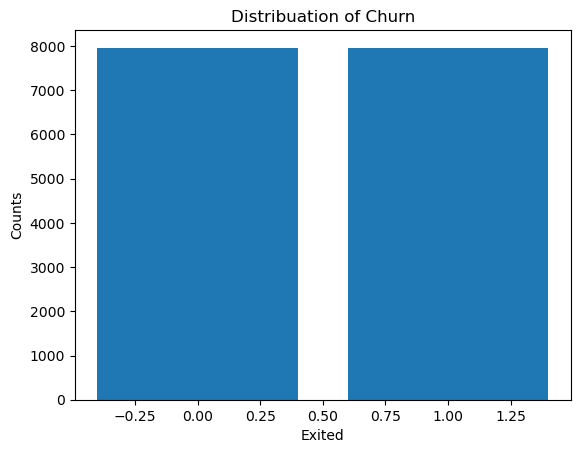

In [50]:
## Barchart to show whether it is balanced or not
plt.bar(counts.index , counts.values)
plt.title('Distribuation of Churn')
plt.xlabel('Exited')
plt.ylabel('Counts')
plt.show()

In [52]:
### Performing train and test set dataset
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [64]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12740, 10), (3186, 10), (12740,), (3186,))

In [66]:
### Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score

import warnings
warnings.simplefilter(action="ignore")

In [67]:
## Scaling the Data
sc = StandardScaler()

In [70]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [72]:
## Accuracy Prediction
models = {
    'lg': LogisticRegression(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'svc': SVC(),
    'knn': KNeighborsClassifier(),
    'gbc': GradientBoostingClassifier(),
    'abc': AdaBoostClassifier(),
    'xgb': XGBClassifier(),  # XGBoost Classifier
}

for name,mod in models.items():
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    print(f'{name} with accuracy {accuracy_score(y_test,y_pred)}')

lg with accuracy 0.7689893283113622
dtc with accuracy 0.8013182674199624
rfc with accuracy 0.8593848085373509
svc with accuracy 0.8471437539234149
knn with accuracy 0.8279974890144381
gbc with accuracy 0.8405524168236033
abc with accuracy 0.8317639673571877
xgb with accuracy 0.8700564971751412


In [74]:
results = []

# Fit models and predict
for name, mod in models.items():
    mod.fit(x_train, y_train)
    y_pred = mod.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': accuracy})

# Create DataFrame from results
final_data = pd.DataFrame(results)

# Display the DataFrame
print(final_data)

  Model  Accuracy
0    lg  0.768989
1   dtc  0.801318
2   rfc  0.859385
3   svc  0.847144
4   knn  0.827997
5   gbc  0.840552
6   abc  0.831764
7   xgb  0.870056


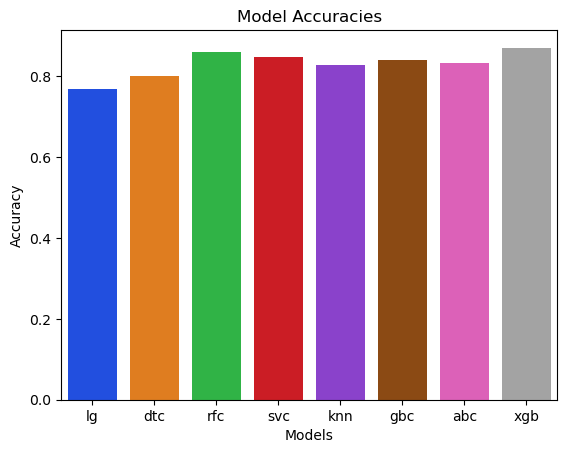

In [78]:
# Create a bar plot for model accuracies
sns.barplot(x='Model', y='Accuracy', data=final_data,palette='bright')

# Add title and labels
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Show the plot
plt.show()

In [80]:
## Evaluation Matrics Performance
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.show()

In [116]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

Accuracy: 0.8700564971751412
Precision: 0.8593059936908517
Recall: 0.8770122343850612
ROC AUC: 0.8702268765311711


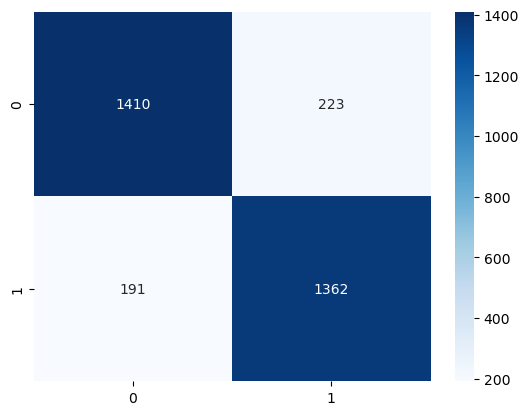

In [117]:
evaluate_model(y_test,y_pred_xgb)

In [86]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

Accuracy: 0.8622096672944131
Precision: 0.8543256997455471
Recall: 0.8647778493238892
ROC AUC: 0.8622725743863782


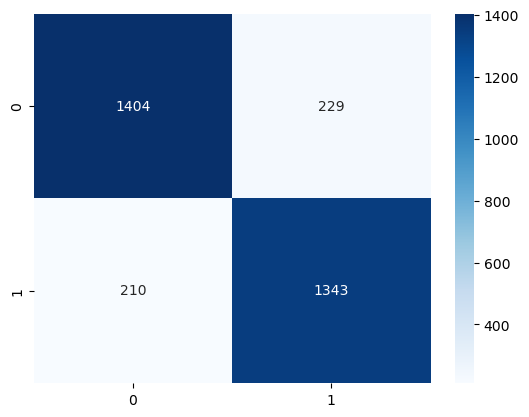

In [87]:
evaluate_model(y_test,y_pred_rf)

In [90]:
svc= SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)

Accuracy: 0.8471437539234149
Precision: 0.8425449871465296
Recall: 0.8441725692208628
ROC AUC: 0.8470709753636463


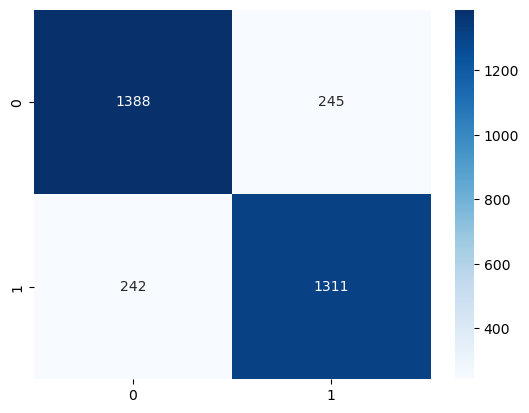

In [91]:
evaluate_model(y_test,y_pred_svc)

In [110]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [112]:
x_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [122]:
# Feature Importance
feature_importance = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Feature Importance:")
feature_importance

Feature Importance:


,Feature,Importance
8,IsActiveMember,0.349826
6,NumOfProducts,0.169724
2,Gender,0.153970
3,Age,0.109965
1,Geography,0.065156
7,HasCrCard,0.047319
5,Balance,0.032569
4,Tenure,0.025799
9,EstimatedSalary,0.024466
0,CreditScore,0.021206


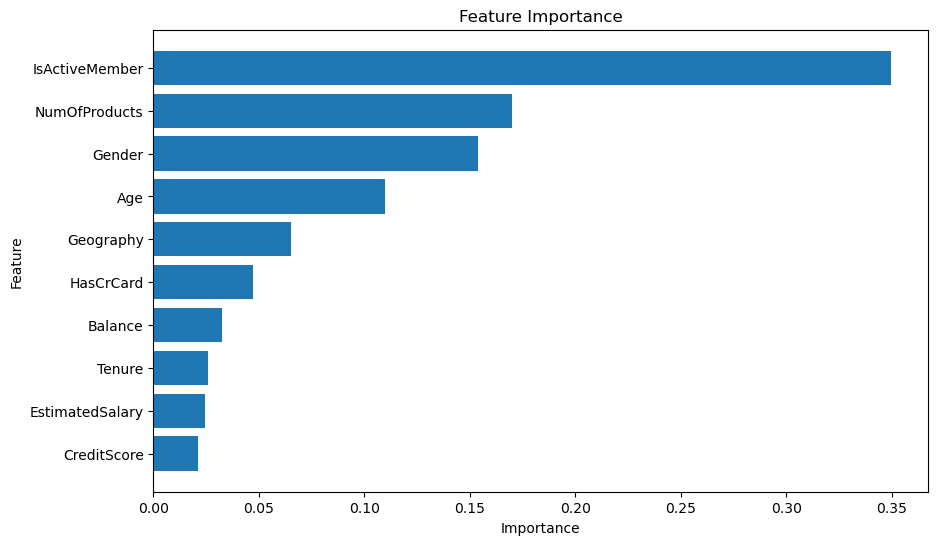

In [124]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], align="center")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [126]:
x_train=sc.fit_transform(x_train)

In [136]:
xgb =XGBClassifier()

In [138]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [140]:
# Save the best_model to a file
import pickle

with open('xgb.pkl', 'wb') as file:
    pickle.dump(xgb, file)

print("Model saved successfully!")

with open('df.pkl', 'wb') as file:
    pickle.dump(df, file)

Model saved successfully!
